## **Getting the MNIST Dataset**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
data = np.vstack([trainData, testData])
labels = np.hstack([trainLabels, testLabels])

11490434/11490434 [==============================] - 0s 0us/step


## **The MNIST Digits**

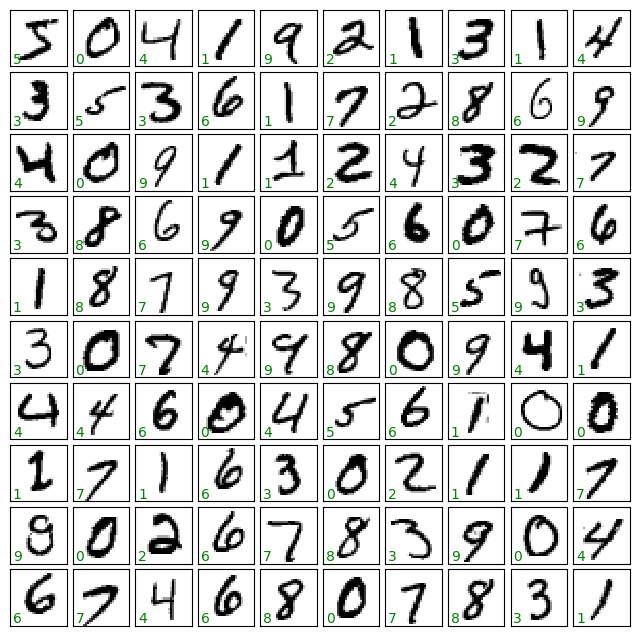

In [ ]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8), gridspec_kw = dict(hspace = 0.1, wspace = 0.1), subplot_kw = {"xticks" : [], "yticks" : []})

for i, ax in enumerate(axes.flat):
    ax.imshow(data[i], cmap = "binary", interpolation = "nearest")
    ax.text(0.05, 0.05, str(labels[i]), transform = ax.transAxes, color = "green")

In [ ]:
dataFlat = data.reshape(data.shape[0], -1)
dataFlat.shape

(70000, 784)

## **KMeans Clustering on the Digits**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from warnings import simplefilter
simplefilter(action = "ignore", category = FutureWarning)

km = KMeans(n_clusters = 10, n_init = "auto")
km.fit(dataFlat)
pred_labels = km.predict(dataFlat)

lab = np.zeros_like(pred_labels)
for i in range(10):
  mask = (pred_labels == i)
  lab[mask] = mode(labels[mask])[0]

print(lab)
print(labels)
print(accuracy_score(lab, labels))

[8 0 4 ... 7 8 6]
[5 0 4 ... 4 5 6]
0.5807


## **Naive Bayes Classifier on the Digits**

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataFlat, labels, train_size = 0.7)
GNB.fit(Xtrain, Ytrain)
y_predict = GNB.predict(Xtest)

print(y_predict)
print(Ytest)
print(accuracy_score(y_predict, Ytest))

[1 0 6 ... 9 6 8]
[1 4 6 ... 7 8 4]
0.5615238095238095


## **Preparing the Data for the CNN**

In [ ]:
print(trainData.shape)
print(trainLabels.shape)
print(testData.shape)
print(testLabels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
Xtrain = trainData.reshape(trainData.shape[0], trainData.shape[1], trainData.shape[2], 1)
Xtest = testData.reshape(testData.shape[0], testData.shape[1], testData.shape[2], 1)
print(Xtrain.shape)

(60000, 28, 28, 1)


In [ ]:
print(trainData[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

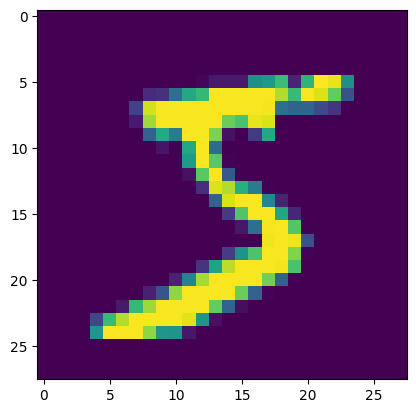

In [ ]:
plt.imshow(Xtrain[0])
plt.show()

## **Categorization of Labels**

For each element in the trainLabels, an array would be created in the Ytrain with size that of the number of distinct labels and only the entry corresponding to the current label will be 1 rest all 0.

In [ ]:
from keras.utils import to_categorical

Ytrain = to_categorical(trainLabels)
Ytest = to_categorical(testLabels)
print(trainLabels)
print(Ytrain)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## **Building the CNN**

* **Conv2D(N, kernel_size = p)**
N represents the number of nodes in this layer and p x p is the dimension of the kernel matrix
* relu --> **ReLU : Rectified Linear Activation**
* Activation functions like the **sigmoid, tanh, ReLU(max(x, 0)), step** map the input to a value between some range (usually -1 to 1)
* input_shape --> Shape of each input image
* The **"Flatten()"** connects the Convolutional layers to the Dense layers of the Neural Network
* **Dense(x, activation)** --> x represents the number of possible outputs (0 - 9 in our case)
* **Softmax** function outputs the values with all summing upto 1 like they are probabilities

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation = "relu", input_shape = Xtrain.shape[1:]))
model.add(Conv2D(32, kernel_size = 3, activation = "relu"))
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

## **Compiling the CNN**

* We require three parameters for compiling : **optimizer, loss, metrics**.
* **Optimizer** decides the **Learning Rate**, LR determines the Weights in each layer
* We have chose **"adam"** as our optimizer
* **Loss** and **metrics** tell our model on which factor's value should it decide/change the weight in each step

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

## **Training the Model**

In [ ]:
model.fit(Xtrain, Ytrain, validation_data = (Xtest, Ytest), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 212s 112ms/step - loss: 0.1965 - accuracy: 0.9536 - val_loss: 0.0878 - val_accuracy: 0.9727
Epoch 2/3
1875/1875 [==============================] - 229s 122ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.0749 - val_accuracy: 0.9767
Epoch 3/3
1875/1875 [==============================] - 259s 138ms/step - loss: 0.0483 - accuracy: 0.9843 - val_loss: 0.0773 - val_accuracy: 0.9768


## **Predictions**

In [ ]:
from sklearn.metrics import accuracy_score
y_model = model.predict(Xtest[:100])
pred = np.argmax(y_model, axis = 1)
actual = np.argmax(Ytest[:100], axis = 1)
print(pred)
print(actual)
print(accuracy_score(pred, actual))

4/4 [==============================] - 0s 31ms/step
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 6 1 7 6 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
0.97
